## Import Libraries

In [25]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
%matplotlib widget

## Load and Visualize

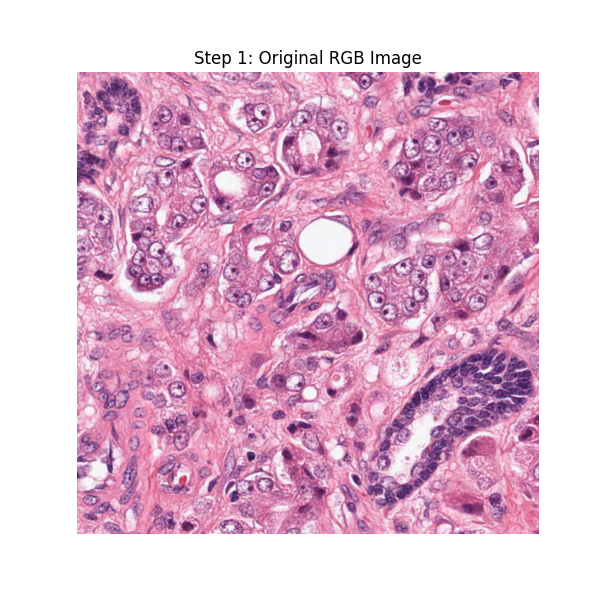

In [28]:
img = cv2.imread('E:\Dataset\MonuSeg-2018\kmms_training\kmms_training\images\TCGA-G9-6348-01Z-00-DX1.tif') 
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(6, 6))
plt.imshow(img_rgb)
plt.title('Step 1: Original RGB Image')
plt.axis('off')
plt.show()

In [30]:
img.shape

(1000, 1000, 3)

## Convert to grayscale

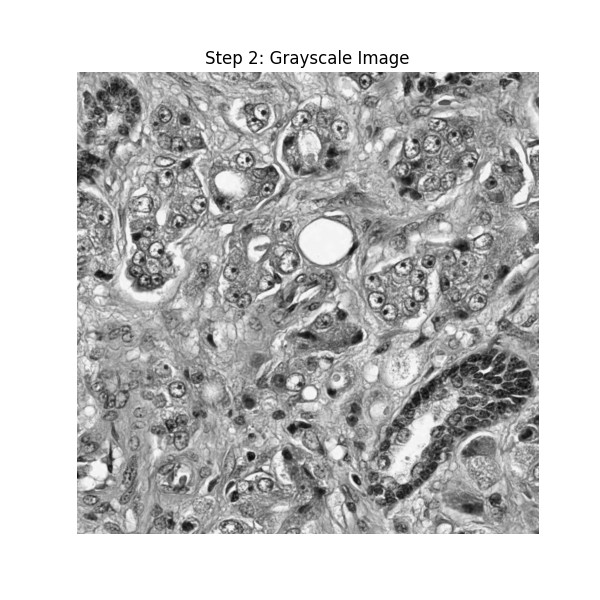

In [32]:
# Step 2: Convert to grayscale
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Display grayscale
plt.figure(figsize=(6, 6))
plt.imshow(gray_img, cmap='gray')
plt.title('Step 2: Grayscale Image')
plt.axis('off')
plt.show()

## Seed Selection

Seed point = Starting pixel for region growing

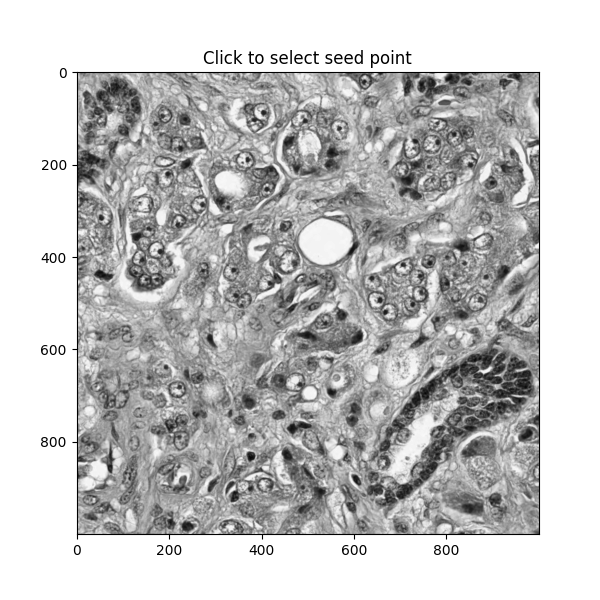

In [34]:
def onclick(event):
    global seed_point
    if event.xdata is not None and event.ydata is not None:
        seed_point = (int(event.ydata), int(event.xdata))
        print("Selected seed point:", seed_point)

        segmented = region_growing(gray_img, seed_point, threshold)
        plt.figure(figsize=(6, 6))
        plt.imshow(segmented, cmap='gray')
        plt.title(f'Region Grown from Seed {seed_point}')
        plt.axis('off')
        plt.show()

fig, ax = plt.subplots(figsize=(6, 6))
ax.imshow(gray_img, cmap='gray')
ax.set_title("Click to select seed point")
cid = fig.canvas.mpl_connect('button_press_event', onclick)
plt.show()

## Set Threshold

In [17]:
threshold = 80
seed_point = (100, 100) 

seed point is a starting pixel (or a set of pixels) from which a region-growing algorithm begins analyzing and segmenting the image.

## Region Growing Function

In [36]:
# Step 4: Region Growing Function
def region_growing(image, seed, threshold):
    H, W = image.shape
    segmented = np.zeros((H, W), np.uint8)
    visited = np.zeros_like(image, dtype=bool)
    seed_value = int(image[seed])

    to_process = [seed]

    while to_process:
        y, x = to_process.pop()
        if visited[y, x]:
            continue
        visited[y, x] = True

        pixel_value = int(image[y, x])
        if abs(pixel_value - seed_value) <= threshold:
            segmented[y, x] = 255

            # 4-neighbors
            if x > 0: to_process.append((y, x - 1))
            if x < W - 1: to_process.append((y, x + 1))
            if y > 0: to_process.append((y - 1, x))
            if y < H - 1: to_process.append((y + 1, x))

    return segmented

## Apply region growing & Show

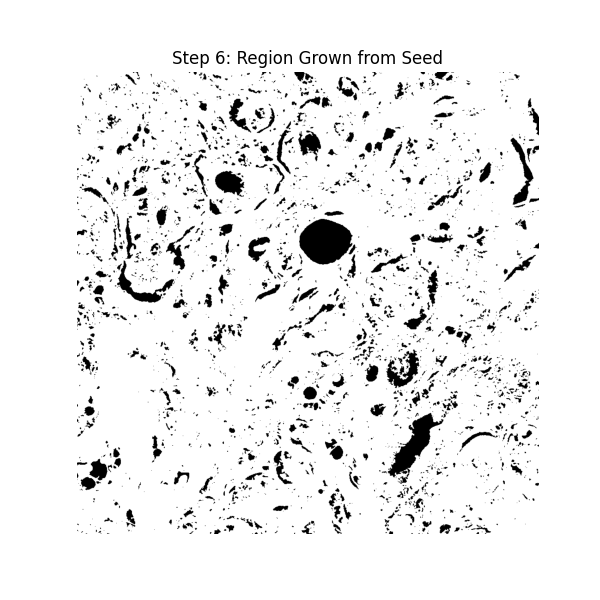

In [38]:
# Step 5: Apply region growing
segmented = region_growing(gray_img, seed_point, threshold)

# Step 6: Show segmented result
plt.figure(figsize=(6, 6))
plt.imshow(segmented, cmap='gray')
plt.title('Step 6: Region Grown from Seed')
plt.axis('off')
plt.show()